In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../data/csv_data/data/dataCOVID19_es.csv')

In [3]:
Spain = data.groupby('fecha', as_index=False).sum()

In [4]:
Spain['nuevos_casos'] = [np.nan]+list(Spain.casos.values[1:] - Spain.casos.values[:-1])

# España

In [5]:
# Total population, N.
N = 42000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 114, 2
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2.7, 1./14
# A grid of time points (in days)
t = np.linspace(0, 60, 160) 

In [6]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [7]:
def SIR_plot(N,t,beta,gamma,I0,R0,S0):
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    fig = plt.figure(facecolor='w', figsize=(12,7))
    ax = fig.add_subplot(111,  axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    #ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    #plt.show()

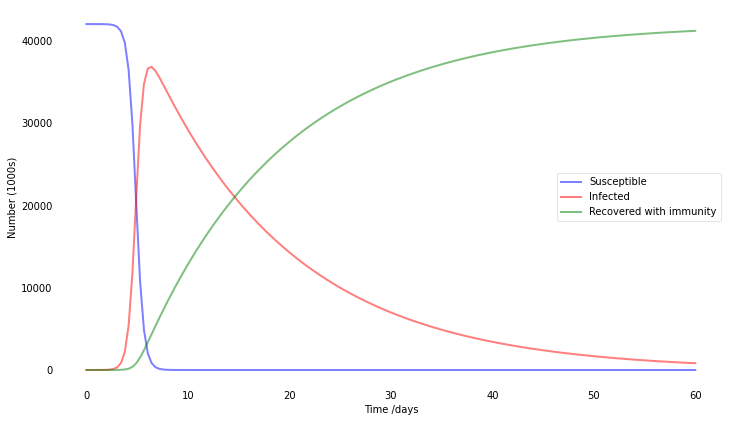

In [8]:
SIR_plot(N,t,beta,gamma,I0,R0,S0)

# Castilla y León

In [9]:
data[data.CCAA=='CastillayLeón']

,CCAA,fecha,casos,IA,UCI,muertes
104,CastillayLeón,2020-03-02,3.0,NaN,NaN,NaN
105,CastillayLeón,2020-03-03,8.0,0.33,NaN,NaN
106,CastillayLeón,2020-03-04,11.0,0.46,1.0,NaN
107,CastillayLeón,2020-03-05,11.0,0.46,1.0,0.0
108,CastillayLeón,2020-03-06,14.0,0.58,1.0,0.0
109,CastillayLeón,2020-03-07,17.0,0.71,1.0,0.0
110,CastillayLeón,2020-03-08,20.0,0.83,1.0,0.0
111,CastillayLeón,2020-03-09,23.0,0.96,1.0,0.0
112,CastillayLeón,2020-03-10,56.0,2.33,2.0,0.0
113,CastillayLeón,2020-03-11,71.0,2.96,2.0,0.0


In [12]:
# Total population, N.
N = 2418694 
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1.4, 1./14
# A grid of time points (in days)
t = np.linspace(0, 60, 105)            

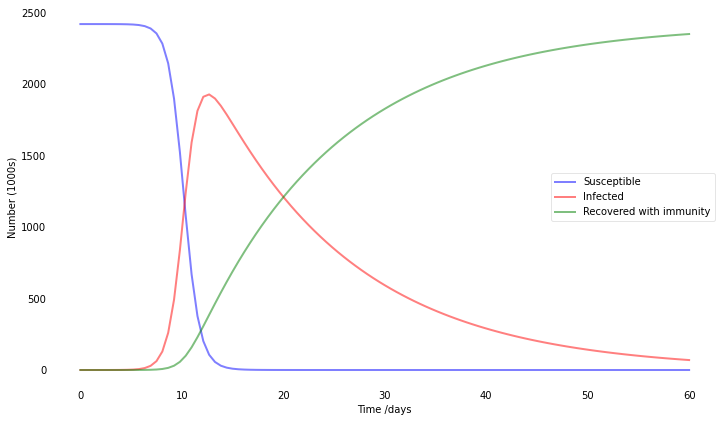

In [13]:
SIR_plot(N,t,beta,gamma,I0,R0,S0)